## Dataset description

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3) -- 32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Loading libriaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading file

In [2]:
file = open("wdbc.data", "r")
file_content = file.read()
data = file_content.split("\n")

data[0]

'842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189'

## Headers for the dataframe

In [3]:
column_names = ['id', 'diagnosis',
                'mean radius', 'mean texture', 'mean perimeter','mean area', 
                'mean smoothness','mean compactness', 'mean concavity','mean concave points',
                'mean symmetry','mean fractal dimension',
                'se radius','se texture','se perimeter','se area','se smoothness',
                'se compactness','se concavity','se concave points','se symmetry','se fractal dimension',
                'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity',
                'worst concave points','worst symmetry','worst fractal dimension']
len(column_names)

32

## Filling the table

In [4]:
table = [[]]

table.pop(0)

for i in data:
    table.append(i.split(','))
    
table.pop(len(table)-1)

['']

## Creating dataframe

In [5]:
df = pd.DataFrame(table, columns = column_names).set_index('id')

df.sample(5)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
id,,,,,,,,,,,,,,,,,,,,,
85922302,M,12.68,23.84,82.69,499,0.1122,0.1262,0.1128,0.06873,0.1905,...,17.09,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.1031
8510824,B,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773
9010259,B,13.05,18.59,85.09,512,0.1082,0.1304,0.09603,0.05603,0.2035,...,14.19,24.85,94.22,591.2,0.1343,0.2658,0.2573,0.1258,0.3113,0.08317
861853,B,13.27,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,0.1386,...,16.36,22.35,104.5,830.6,0.1006,0.1238,0.135,0.1001,0.2027,0.06206
90524101,M,17.99,20.66,117.8,991.7,0.1036,0.1304,0.1201,0.08824,0.1992,...,21.08,25.41,138.1,1349,0.1482,0.3735,0.3301,0.1974,0.306,0.08503


## Data shape

In [6]:
df.shape

(569, 31)

## Dataframe info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   diagnosis                569 non-null    object
 1   mean radius              569 non-null    object
 2   mean texture             569 non-null    object
 3   mean perimeter           569 non-null    object
 4   mean area                569 non-null    object
 5   mean smoothness          569 non-null    object
 6   mean compactness         569 non-null    object
 7   mean concavity           569 non-null    object
 8   mean concave points      569 non-null    object
 9   mean symmetry            569 non-null    object
 10  mean fractal dimension   569 non-null    object
 11  se radius                569 non-null    object
 12  se texture               569 non-null    object
 13  se perimeter             569 non-null    object
 14  se area                  569 non-null   

## Changing datatypes

In [8]:
for i in range(0,len(column_names)):
    try:
        df[column_names[i]] = pd.to_numeric(df[column_names[i]])
    except:
        pass
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  se radius                569 non-null    float64
 12  se texture               569 non-null    float64
 13  se perimeter             569 non-null    float64
 14  se area                 

## Checking null values

In [9]:
df.isna().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
se radius                  0
se texture                 0
se perimeter               0
se area                    0
se smoothness              0
se compactness             0
se concavity               0
se concave points          0
se symmetry                0
se fractal dimension       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Checking the duplicates

In [10]:
df.duplicated().sum()

0

## Changing the decision attribute from categorical to numeric

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
df['diagnosis'].replace({'M':1,'B':0}, inplace=True)
df['diagnosis'].unique()

array([1, 0])

## Correlation Matrix

<AxesSubplot: >

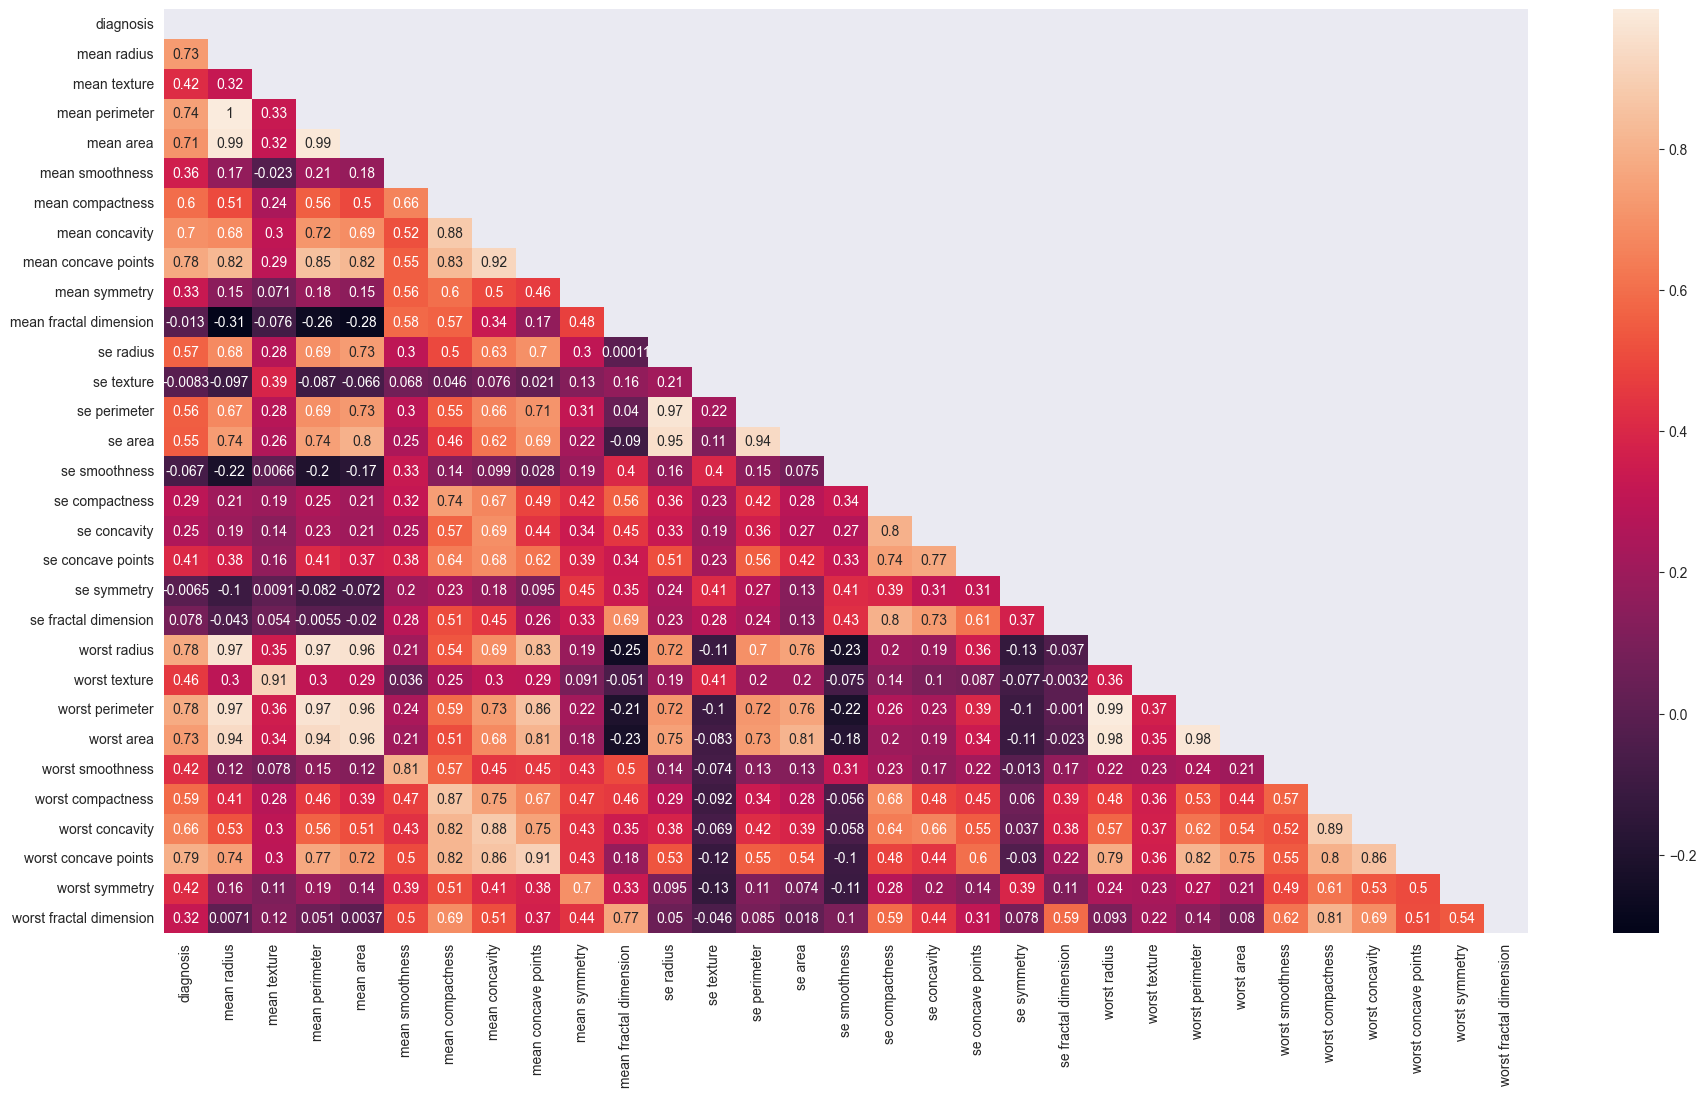

In [13]:
plt.figure(figsize=(22,12))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

## Checking the outliers of the data using seaborn 

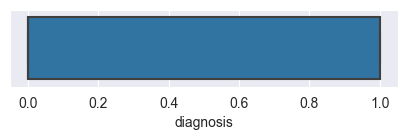

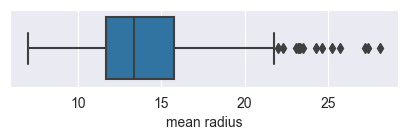

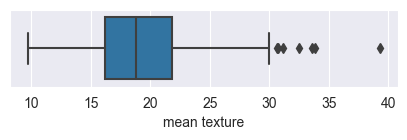

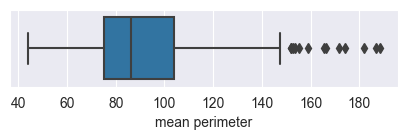

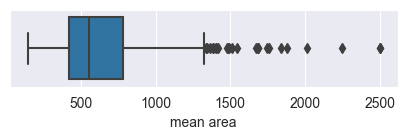

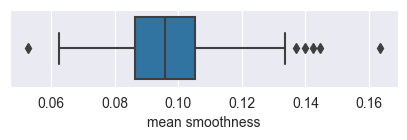

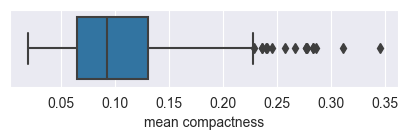

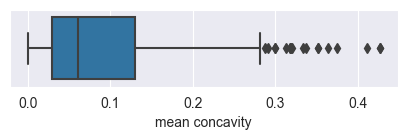

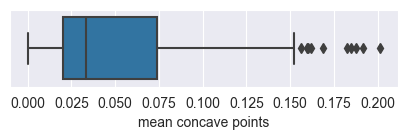

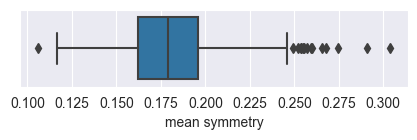

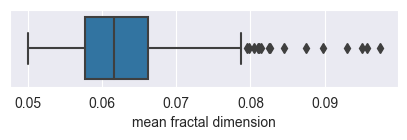

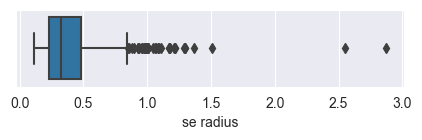

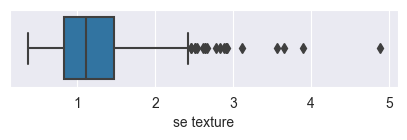

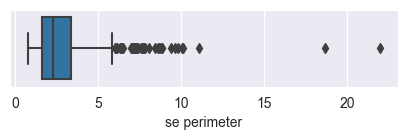

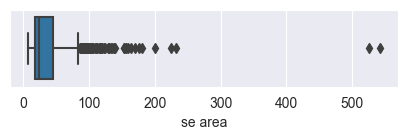

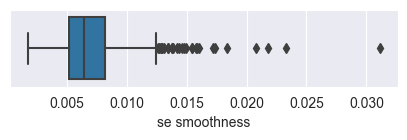

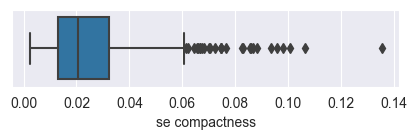

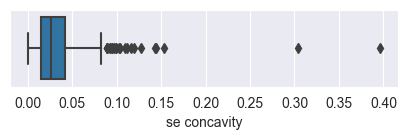

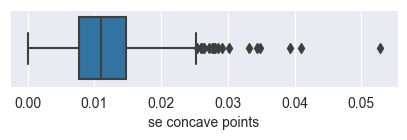

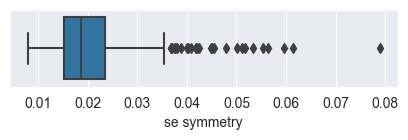

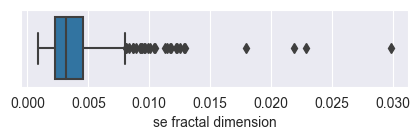

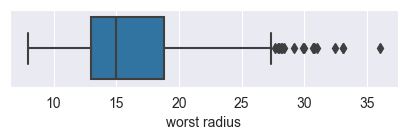

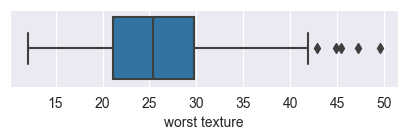

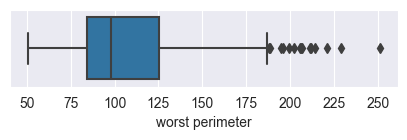

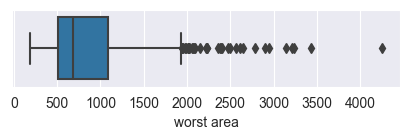

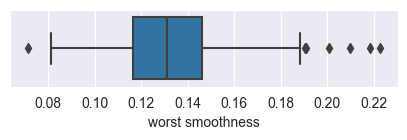

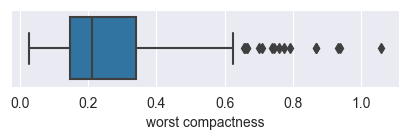

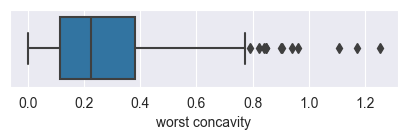

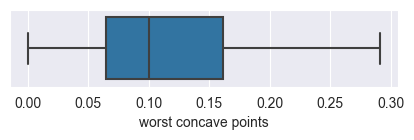

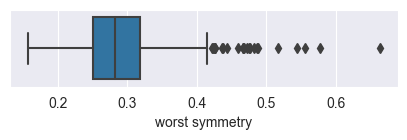

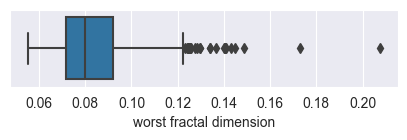

In [14]:
for column in df:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=df, x=column)

## Removing the outliers usinig interquantile range

In [15]:
q_three = df.quantile(0.85)
q_one = df.quantile(0.15)
i_quantile = q_three - q_one
lower_bound = q_one - (1.5 * i_quantile)
upper_bound = q_three + (1.5 * i_quantile)
df_outl = df[~((df < lower_bound) |(df > upper_bound)).any(axis=1)]

df_outl

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
id,,,,,,,,,,,,,,,,,,,,,
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637


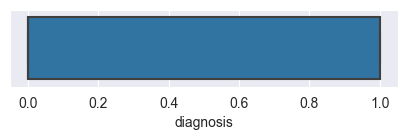

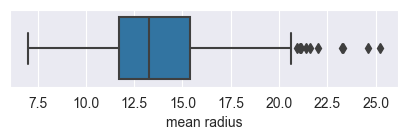

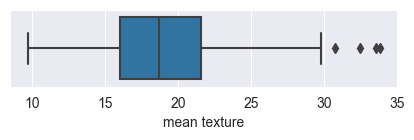

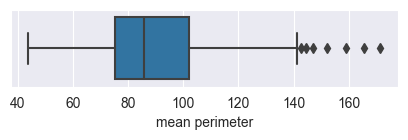

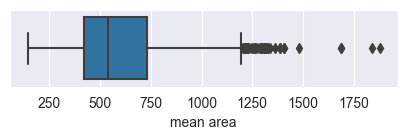

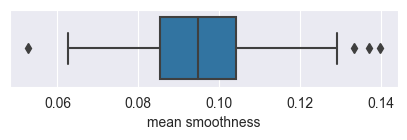

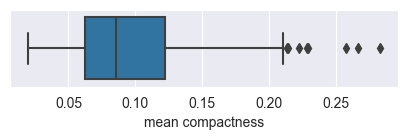

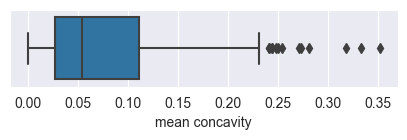

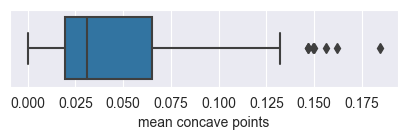

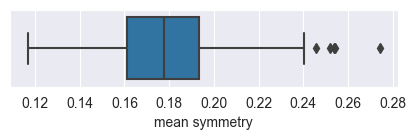

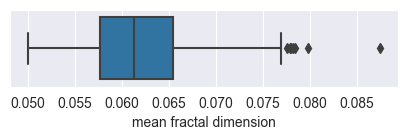

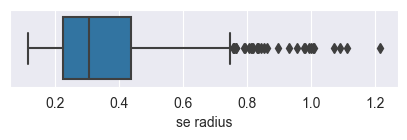

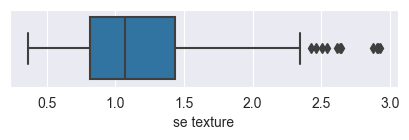

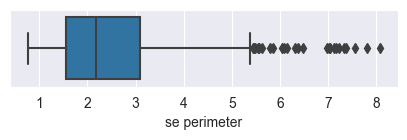

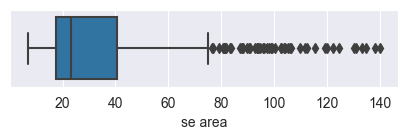

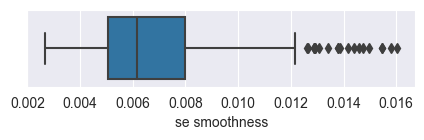

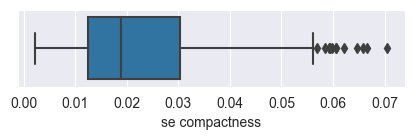

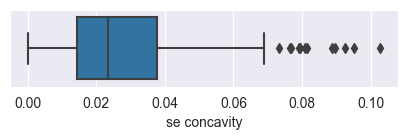

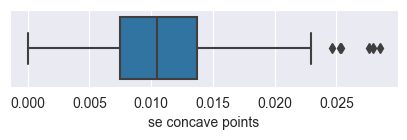

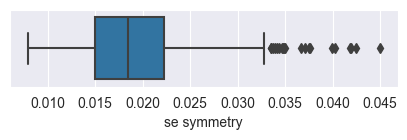

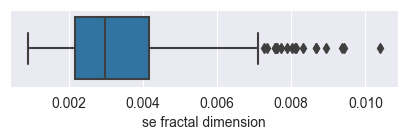

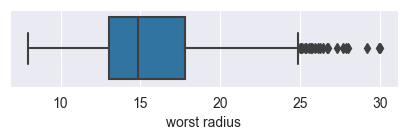

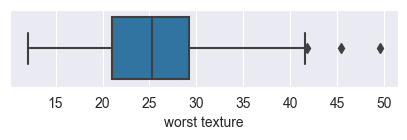

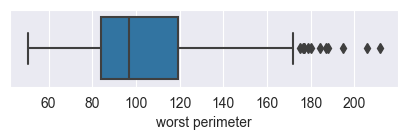

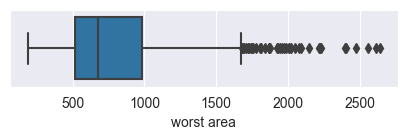

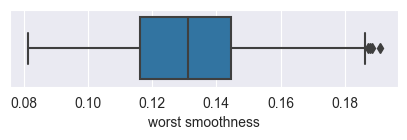

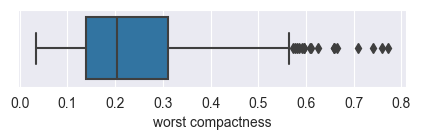

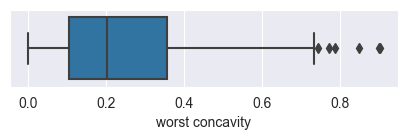

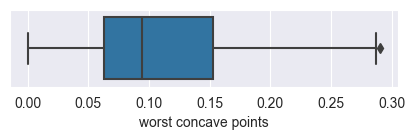

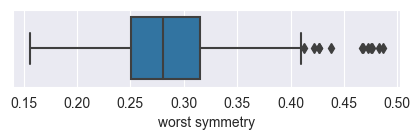

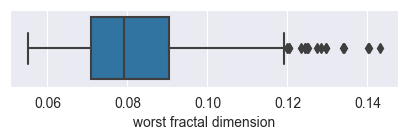

In [16]:
for column in df_outl:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=df_outl, x=column)

## Spliting the dataset for decisive attribute

In [17]:
from sklearn.model_selection import train_test_split

X = df_outl.drop(columns='diagnosis')
y = df_outl['diagnosis']

len(X)

513

## Balance of the dataset

In [18]:
y.value_counts()

0    338
1    175
Name: diagnosis, dtype: int64

## Oversampling

In [19]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X_over,y_over=RandomOverSampler().fit_resample(X,y)
print(Counter(y_over))

Counter({1: 338, 0: 338})


## Normalization of the attributes

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
trans = scaler.fit(X_over)
X_norm = trans.transform(X_over)

df_norm = pd.DataFrame(X_norm,columns=column_names[2:32])
df_norm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.745052,0.334440,0.697753,0.681753,0.368361,0.224623,0.246665,0.380325,0.409264,0.179077,...,0.772995,0.303571,0.672019,0.720775,0.388053,0.206291,0.267434,0.640717,0.359309,0.385873
1,0.696804,0.478838,0.675045,0.610839,0.653551,0.532636,0.560318,0.693225,0.572335,0.267681,...,0.708654,0.360075,0.632959,0.620238,0.575923,0.528570,0.498561,0.837065,0.620982,0.369521
2,0.729700,0.192116,0.714979,0.665033,0.546862,0.429914,0.562021,0.565312,0.407360,0.236723,...,0.661985,0.123934,0.631099,0.565695,0.512084,0.231217,0.442772,0.559766,0.242268,0.246877
3,0.299852,0.248548,0.303657,0.192332,0.862338,0.570920,0.447914,0.438428,0.583756,0.698425,...,0.341640,0.312633,0.328539,0.226473,0.892385,0.664580,0.592761,0.599724,0.733778,0.787645
4,0.617852,0.426141,0.593611,0.516864,0.481817,0.339701,0.319898,0.401084,0.397843,0.199093,...,0.677390,0.416844,0.637299,0.578313,0.574099,0.302474,0.418862,0.665518,0.454215,0.325233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.527386,0.762241,0.505129,0.411992,0.366181,0.314305,0.262589,0.287371,0.268401,0.174006,...,0.500680,0.589019,0.472999,0.382123,0.297766,0.372646,0.376688,0.488460,0.197999,0.263002
672,0.578924,0.398755,0.558374,0.465898,0.425032,0.380638,0.294068,0.405854,0.215102,0.132106,...,0.565927,0.368337,0.552359,0.428932,0.518468,0.416809,0.388311,0.667930,0.413281,0.268340
673,0.774110,0.448548,0.738470,0.715192,0.507170,0.371920,0.446211,0.626016,0.245558,0.177475,...,0.804259,0.534382,0.730299,0.747639,0.506612,0.373595,0.486938,0.785394,0.213159,0.218147
674,0.351938,0.448548,0.351186,0.238224,0.665022,0.483360,0.410162,0.442927,0.602157,0.621564,...,0.384232,0.470149,0.389919,0.268317,0.694482,0.475873,0.565198,0.706511,0.612492,0.634340


In [21]:
df_norm.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
314,0.256538,0.305394,0.234202,0.159988,0.263623,0.064135,0.023576,0.062981,0.319797,0.196157,...,0.242411,0.205757,0.205840,0.145433,0.167168,0.041237,0.033717,0.146814,0.353548,0.150011
471,0.234607,0.419917,0.215410,0.141020,0.372605,0.093814,0.014383,0.030699,0.298223,0.359488,...,0.181242,0.384062,0.161014,0.102043,0.269494,0.058129,0.028039,0.097554,0.300788,0.239496
594,0.774110,0.448548,0.738470,0.715192,0.507170,0.371920,0.446211,0.626016,0.245558,0.177475,...,0.804259,0.534382,0.730299,0.747639,0.506612,0.373595,0.486938,0.785394,0.213159,0.218147
279,0.418280,0.248133,0.382820,0.300605,0.270162,0.059776,0.041073,0.101734,0.295051,0.069122,...,0.386498,0.259328,0.330399,0.266851,0.181031,0.049514,0.052535,0.200241,0.292602,0.021690
52,0.332749,0.398340,0.303970,0.221216,0.320867,0.070161,0.001964,0.022585,0.413706,0.134774,...,0.285455,0.272655,0.246946,0.178647,0.190150,0.037376,0.002042,0.038271,0.265009,0.089144


## PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(676, 2)

Text(0, 0.5, '2dim')

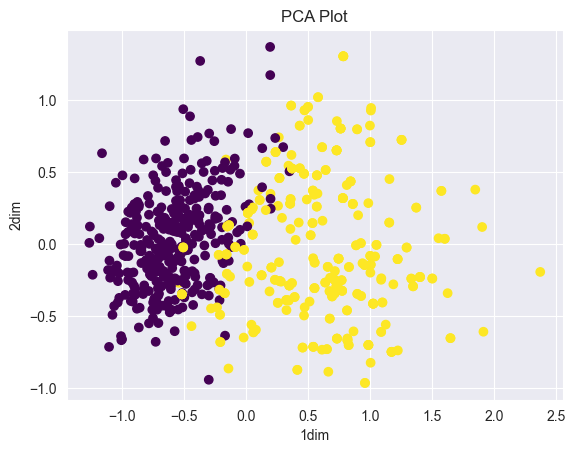

In [23]:
x_plot = []
y_plot = []
for x in X_pca:
    x_plot.append(x[0])
    y_plot.append(x[1])

plt.scatter(x_plot, y_plot, c=y_over,cmap='viridis')
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':80})
plt.title('PCA Plot')
plt.xlabel('1dim')
plt.ylabel('2dim')

## Feature selection using KBest

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [26]:
def best_k():
    scores = []
    for i in range(1,30):
        chi2_selector = SelectKBest(chi2, k=i)
        X_kbest = chi2_selector.fit_transform(X_over, y_over)
        X_train_chi, X_test_chi, y_train, y_test = train_test_split(X_kbest, y_over, test_size=0.25, shuffle=True)
        model = LogisticRegression()
        model.fit(X_train_chi, y_train)
        scores.append(model.score(X_test_chi, y_test))
    plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':80})
    plt.figure()
    plt.plot(np.arange(0, 29, step=1),scores)
    plt.title('K')
    plt.xlabel('K value')
    plt.ylabel('K score')
    plt.grid()

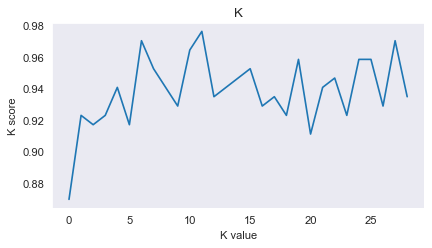

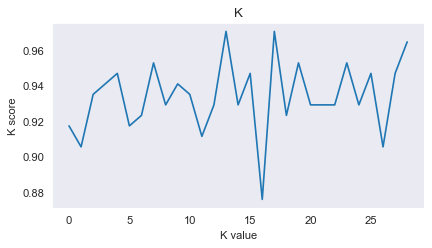

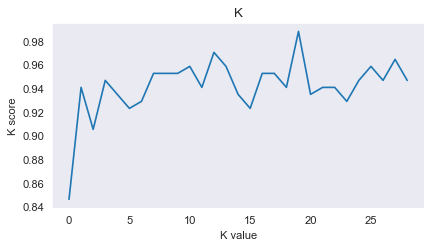

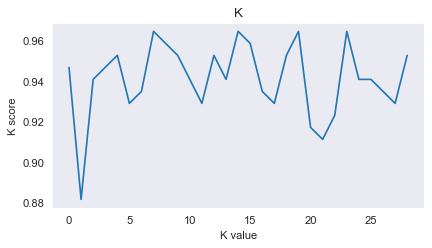

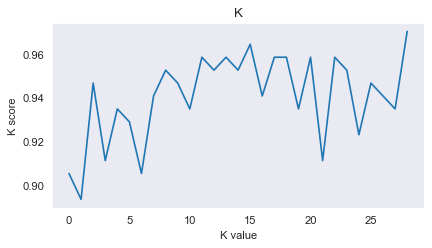

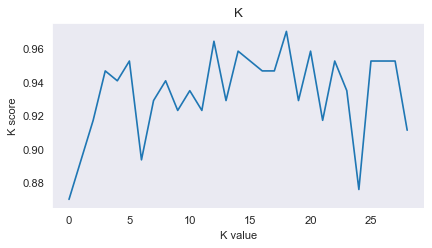

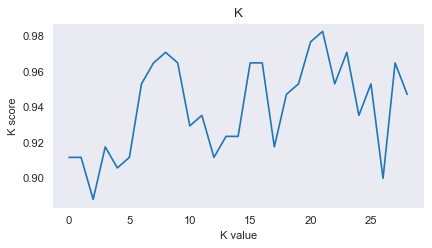

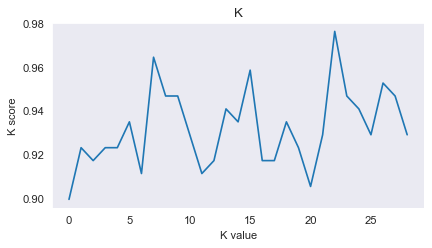

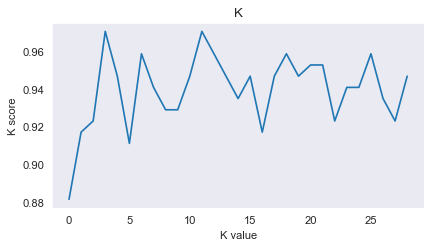

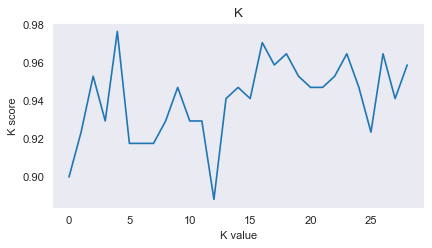

In [27]:
for i in range(0,10):
    best_k()

In [28]:
chi2_selector = SelectKBest(chi2, k=16)
X_kbest = chi2_selector.fit_transform(X_over, y_over)
chi2_selector.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'se radius',
       'se perimeter', 'se area', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness',
       'worst concavity', 'worst concave points'], dtype=object)

In [29]:
final_df = pd.DataFrame(X_kbest, columns = chi2_selector.get_feature_names_out())

final_df

,mean radius,mean texture,mean perimeter,mean area,mean concavity,mean concave points,se radius,se perimeter,se area,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,20.57,17.77,132.90,1326.0,0.08690,0.07017,0.5435,3.398,74.08,24.99,23.41,158.8,1956.0,0.1866,0.2416,0.1860
1,19.69,21.25,130.00,1203.0,0.19740,0.12790,0.7456,4.585,94.03,23.57,25.53,152.5,1709.0,0.4245,0.4504,0.2430
2,20.29,14.34,135.10,1297.0,0.19800,0.10430,0.7572,5.438,94.44,22.54,16.67,152.2,1575.0,0.2050,0.4000,0.1625
3,12.45,15.70,82.57,477.1,0.15780,0.08089,0.3345,2.217,27.19,15.47,23.75,103.4,741.6,0.5249,0.5355,0.1741
4,18.25,19.98,119.60,1040.0,0.11270,0.07400,0.4467,3.180,53.91,22.88,27.66,153.2,1606.0,0.2576,0.3784,0.1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,16.60,28.08,108.30,858.1,0.09251,0.05302,0.4564,3.425,48.55,18.98,34.12,126.7,1124.0,0.3094,0.3403,0.1418
672,17.54,19.32,115.10,951.6,0.10360,0.07488,0.3971,3.088,40.73,20.42,25.84,139.5,1239.0,0.3420,0.3508,0.1939
673,21.10,20.52,138.10,1384.0,0.15720,0.11550,0.6643,4.542,81.89,25.68,32.07,168.2,2022.0,0.3101,0.4399,0.2280
674,13.40,20.52,88.64,556.7,0.14450,0.08172,0.3906,3.093,33.67,16.41,29.66,113.3,844.4,0.3856,0.5106,0.2051


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y_over, test_size=0.25, shuffle=True)

## Calculating K for KNN

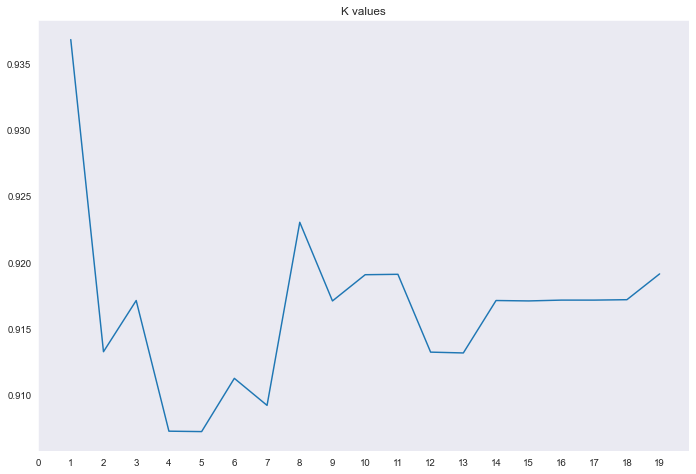

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':70})

knn_res=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=8)
    knn_res.append(scores.mean())

plt.plot([k for k in range(1,20)],knn_res)
plt.title("K values")
plt.xticks(ticks=np.arange(0, 20, step=1), labels=np.arange(0, 20, step=1))

plt.grid()

## KNN

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        83
           1       0.91      0.91      0.91        86

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



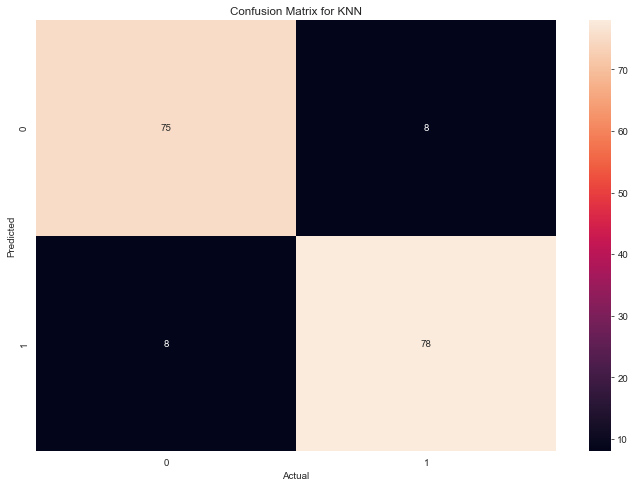

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
con_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.plot()
sns.heatmap(con_knn, annot=True)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for KNN')

print(classification_report(y_test,knn.predict(X_test)))

## Linear SVC

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        83
           1       0.97      0.83      0.89        86

    accuracy                           0.90       169
   macro avg       0.91      0.90      0.90       169
weighted avg       0.91      0.90      0.90       169



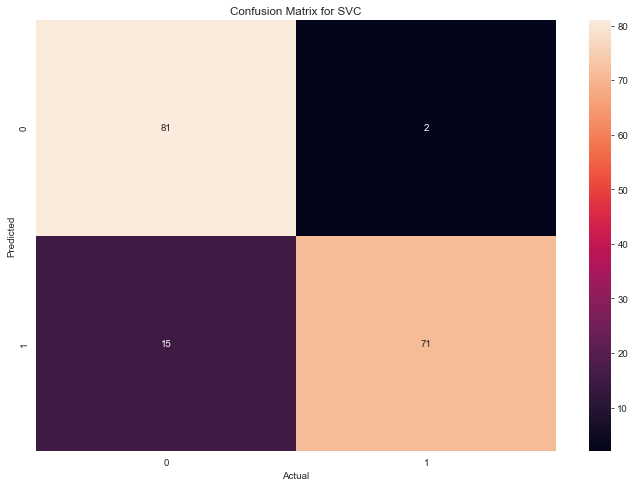

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

svc = LinearSVC(verbose=0)

svc.fit(X_train, y_train)
score = svc.score(X_train, y_train)
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

con_svc=confusion_matrix(y_test,svc.predict(X_test))
sns.heatmap(con_svc, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for SVC')

print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.98        86

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



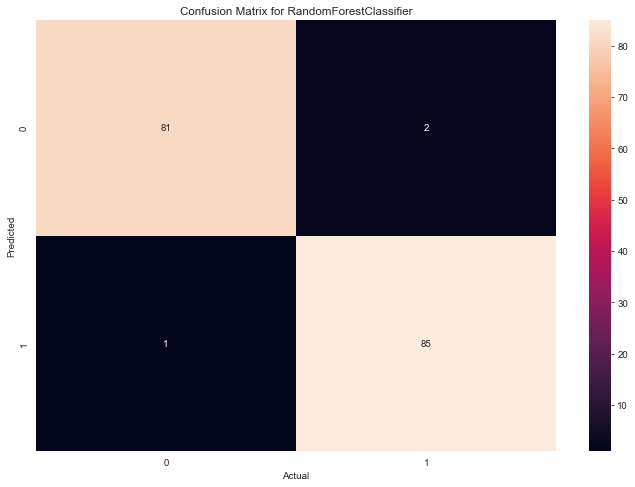

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=45)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

con_rfc=confusion_matrix(y_test,rfc.predict(X_test))

sns.heatmap(con_rfc,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for RandomForestClassifier')


print(classification_report(y_test,y_pred))

## Logistic regression

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        83
           1       0.94      0.98      0.96        86

    accuracy                           0.96       169
   macro avg       0.96      0.96      0.96       169
weighted avg       0.96      0.96      0.96       169



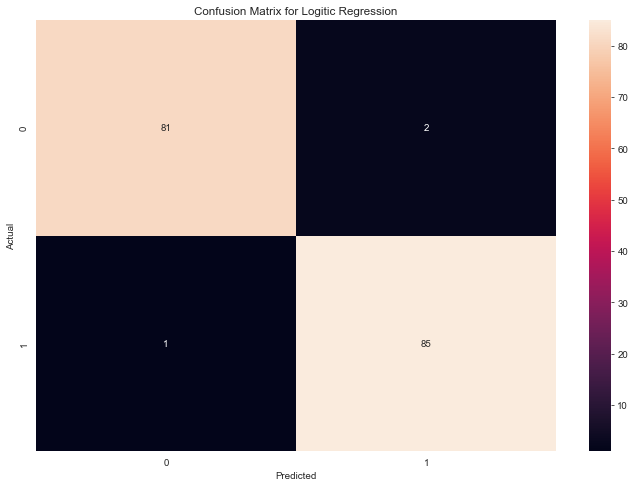

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

con_lg=confusion_matrix(y_test,logmodel.predict(X_test))
y_pred=logmodel.predict(X_test)

sns.heatmap(con_rfc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logitic Regression")

print(classification_report(y_test,y_pred))

## Conclusion
Since the Random Forrest Classifier has the best f-1 score and accuracy then it's chosen to be the model for the classification.

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3) - 32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Loading libriaries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading file

In [45]:
file = open("wdbc.data", "r")
file_content = file.read()
data = file_content.split("\n")

data[0]

'842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189'

## Headers for the dataframe

In [46]:
column_names = ['id', 'diagnosis',
                'mean radius', 'mean texture', 'mean perimeter','mean area', 
                'mean smoothness','mean compactness', 'mean concavity','mean concave points',
                'mean symmetry','mean fractal dimension',
                'se radius','se texture','se perimeter','se area','se smoothness',
                'se compactness','se concavity','se concave points','se symmetry','se fractal dimension',
                'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity',
                'worst concave points','worst symmetry','worst fractal dimension']
len(column_names)

32

## Filling the table

In [47]:
table = [[]]

table.pop(0)

for i in data:
    table.append(i.split(','))
    
table.pop(len(table)-1)

['']

## Creating dataframe

In [48]:
df = pd.DataFrame(table, columns = column_names).set_index('id')

df.sample(5)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
id,,,,,,,,,,,,,,,,,,,,,
852631,M,17.14,16.4,116,912.7,0.1186,0.2276,0.2229,0.1401,0.304,...,22.25,21.4,152.4,1461,0.1545,0.3949,0.3853,0.255,0.4066,0.1059
9112367,B,13.21,25.25,84.1,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.139,0.06005,0.2444,0.06788
917896,B,13.71,18.68,88.73,571,0.09916,0.107,0.05385,0.03783,0.1714,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.1935,0.1284,0.2849,0.09031
879830,M,17.01,20.26,109.7,904.3,0.08772,0.07304,0.0695,0.0539,0.2026,...,19.8,25.05,130,1210,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469
861648,B,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,...,16.11,29.11,102.9,803.7,0.1115,0.1766,0.09189,0.06946,0.2522,0.07246


## Data shape

In [49]:
df.shape

(569, 31)

## Dataframe info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   diagnosis                569 non-null    object
 1   mean radius              569 non-null    object
 2   mean texture             569 non-null    object
 3   mean perimeter           569 non-null    object
 4   mean area                569 non-null    object
 5   mean smoothness          569 non-null    object
 6   mean compactness         569 non-null    object
 7   mean concavity           569 non-null    object
 8   mean concave points      569 non-null    object
 9   mean symmetry            569 non-null    object
 10  mean fractal dimension   569 non-null    object
 11  se radius                569 non-null    object
 12  se texture               569 non-null    object
 13  se perimeter             569 non-null    object
 14  se area                  569 non-null   

## Changing datatypes

In [51]:
for i in range(0,len(column_names)):
    try:
        df[column_names[i]] = pd.to_numeric(df[column_names[i]])
    except:
        pass
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  se radius                569 non-null    float64
 12  se texture               569 non-null    float64
 13  se perimeter             569 non-null    float64
 14  se area                 

## Checking null values

In [52]:
df.isna().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
se radius                  0
se texture                 0
se perimeter               0
se area                    0
se smoothness              0
se compactness             0
se concavity               0
se concave points          0
se symmetry                0
se fractal dimension       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Checking the duplicates

In [53]:
df.duplicated().sum()

0

## Changing the decision attribute from categorical to numeric

In [54]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [55]:
df['diagnosis'].replace({'M':1,'B':0}, inplace=True)
df['diagnosis'].unique()

array([1, 0])

## Correlation Matrix

<AxesSubplot:>

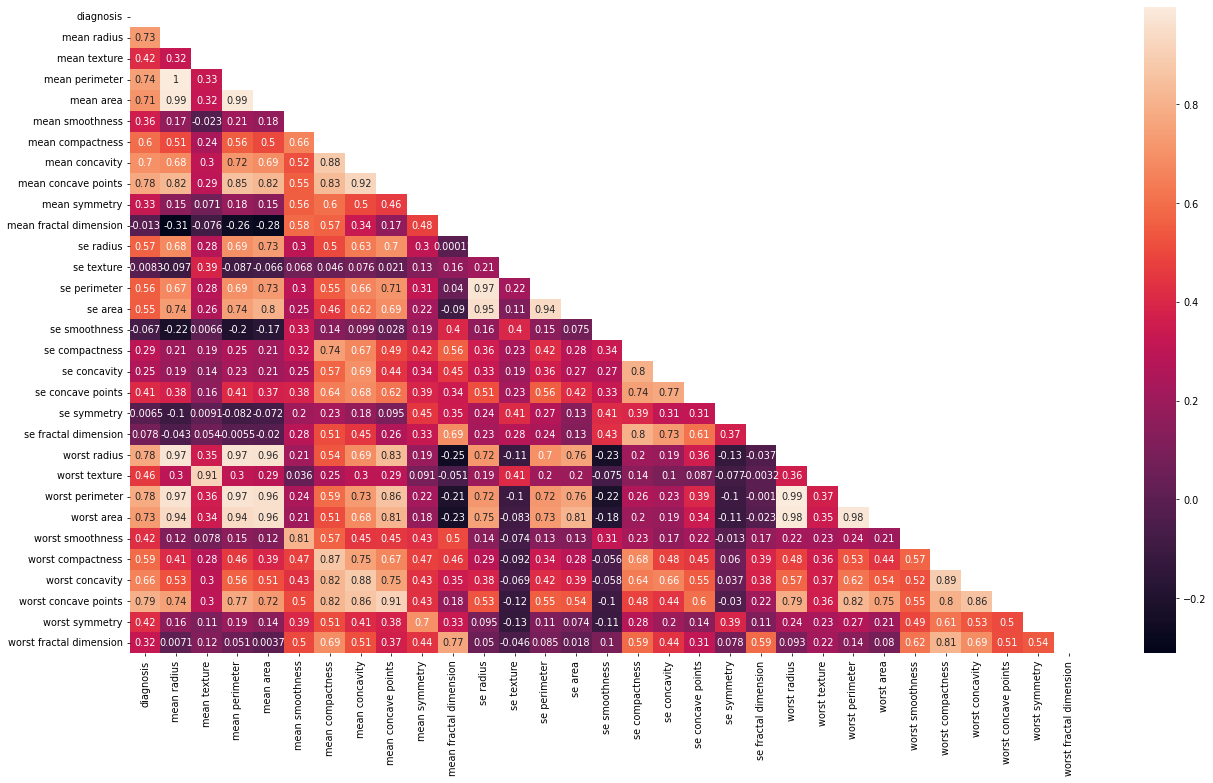

In [56]:
plt.figure(figsize=(22,12))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

## Checking the outliers of the data using seaborn 

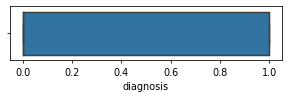

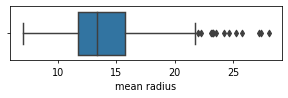

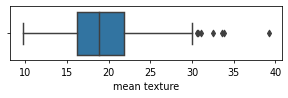

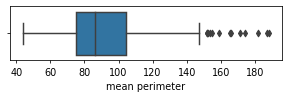

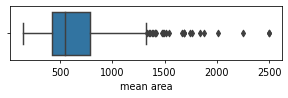

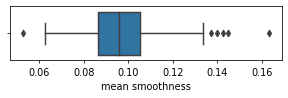

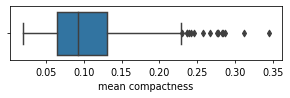

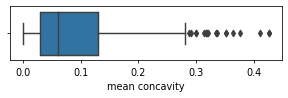

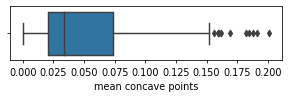

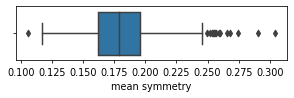

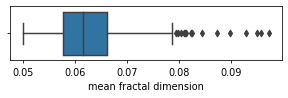

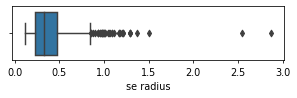

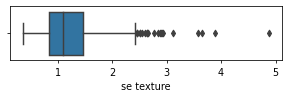

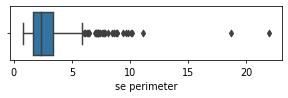

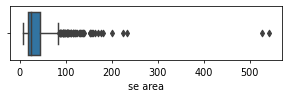

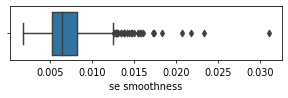

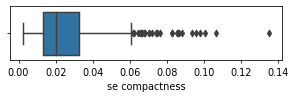

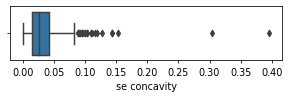

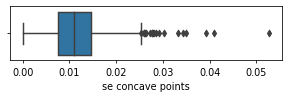

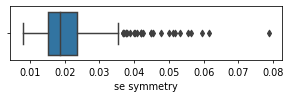

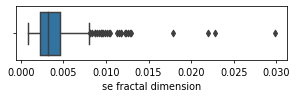

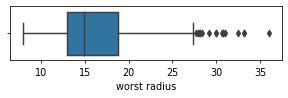

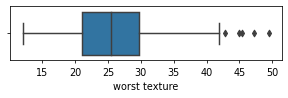

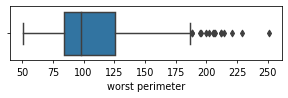

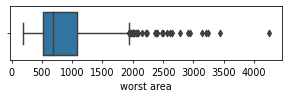

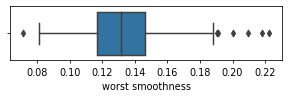

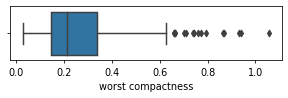

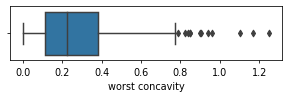

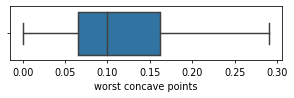

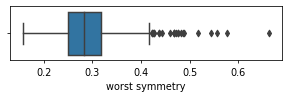

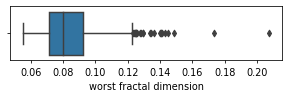

In [57]:
for column in df:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=df, x=column)

## Removing the outliers usinig interquantile range

In [58]:
q_three = df.quantile(0.85)
q_one = df.quantile(0.15)
i_quantile = q_three - q_one
lower_bound = q_one - (1.5 * i_quantile)
upper_bound = q_three + (1.5 * i_quantile)
df_outl = df[~((df < lower_bound) |(df > upper_bound)).any(axis=1)]

df_outl

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
id,,,,,,,,,,,,,,,,,,,,,
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637


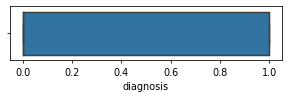

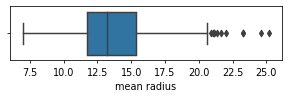

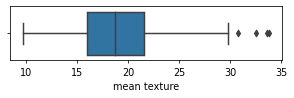

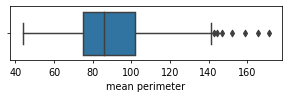

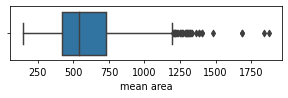

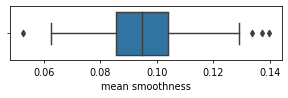

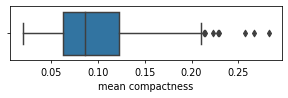

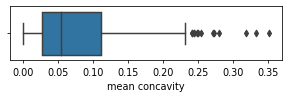

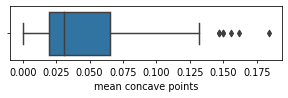

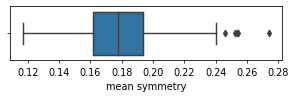

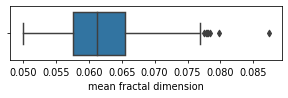

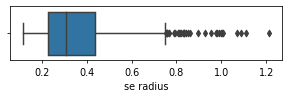

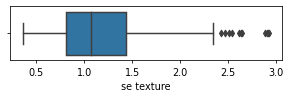

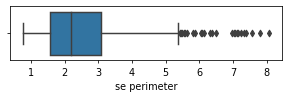

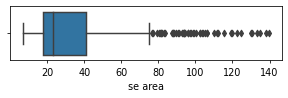

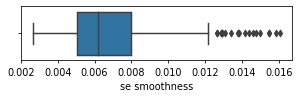

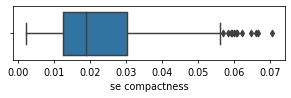

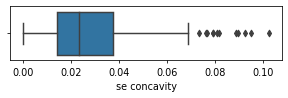

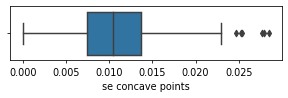

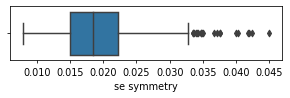

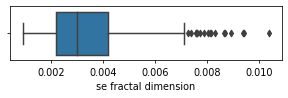

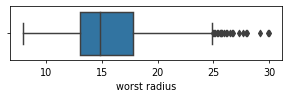

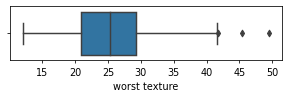

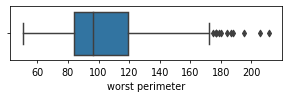

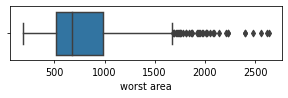

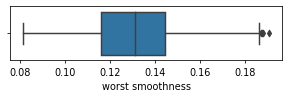

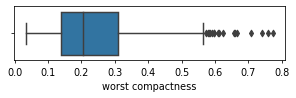

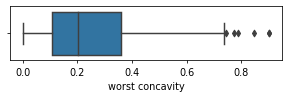

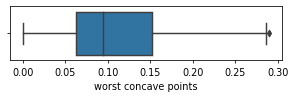

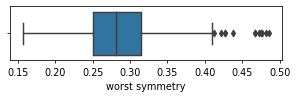

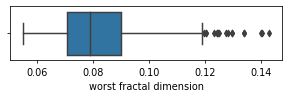

In [59]:
for column in df_outl:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=df_outl, x=column)

## Spliting the dataset for decisive attribute

In [60]:
from sklearn.model_selection import train_test_split

X = df_outl.drop(columns='diagnosis')
y = df_outl['diagnosis']

len(X)

513

## Balance of the dataset

In [61]:
y.value_counts()

0    338
1    175
Name: diagnosis, dtype: int64

## Oversampling

In [62]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X_over,y_over=RandomOverSampler().fit_resample(X,y)
print(Counter(y_over))

Counter({1: 338, 0: 338})


## Normalization of the attributes

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
trans = scaler.fit(X_over)
X_norm = trans.transform(X_over)

df_norm = pd.DataFrame(X_norm,columns=column_names[2:32])
df_norm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.745052,0.334440,0.697753,0.681753,0.368361,0.224623,0.246665,0.380325,0.409264,0.179077,...,0.772995,0.303571,0.672019,0.720775,0.388053,0.206291,0.267434,0.640717,0.359309,0.385873
1,0.696804,0.478838,0.675045,0.610839,0.653551,0.532636,0.560318,0.693225,0.572335,0.267681,...,0.708654,0.360075,0.632959,0.620238,0.575923,0.528570,0.498561,0.837065,0.620982,0.369521
2,0.729700,0.192116,0.714979,0.665033,0.546862,0.429914,0.562021,0.565312,0.407360,0.236723,...,0.661985,0.123934,0.631099,0.565695,0.512084,0.231217,0.442772,0.559766,0.242268,0.246877
3,0.299852,0.248548,0.303657,0.192332,0.862338,0.570920,0.447914,0.438428,0.583756,0.698425,...,0.341640,0.312633,0.328539,0.226473,0.892385,0.664580,0.592761,0.599724,0.733778,0.787645
4,0.617852,0.426141,0.593611,0.516864,0.481817,0.339701,0.319898,0.401084,0.397843,0.199093,...,0.677390,0.416844,0.637299,0.578313,0.574099,0.302474,0.418862,0.665518,0.454215,0.325233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.439114,0.642739,0.405215,0.320150,0.473099,0.121029,0.068067,0.157127,0.252538,0.135575,...,0.319891,0.351279,0.279807,0.209052,0.115093,0.023016,0.026544,0.099862,0.000000,0.000000
672,0.468721,0.989627,0.469110,0.346728,0.615693,0.547798,0.497020,0.455230,0.586294,0.441420,...,0.478478,1.000000,0.470519,0.345897,0.976288,0.707253,0.631282,0.693765,0.590358,0.742221
673,0.507648,0.375934,0.509044,0.381436,0.619135,0.609582,0.552938,0.490623,0.449873,0.450494,...,0.481196,0.348348,0.474239,0.344269,0.503876,0.591021,0.556343,0.596624,0.365373,0.582103
674,0.532321,0.435270,0.495733,0.411704,0.256281,0.196119,0.103576,0.125041,0.430838,0.087804,...,0.509742,0.387527,0.476719,0.365842,0.179207,0.349075,0.274186,0.300965,0.943602,0.240631


In [64]:
df_norm.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
57,0.120182,0.172199,0.120664,0.067685,0.281978,0.258244,0.169969,0.118157,0.744924,0.524953,...,0.094246,0.192164,0.094116,0.050838,0.156042,0.180823,0.154638,0.175233,0.520619,0.339087
340,0.222545,0.216598,0.210477,0.132142,0.312493,0.194868,0.100653,0.112412,0.530457,0.333600,...,0.188491,0.234808,0.181784,0.106602,0.257638,0.222005,0.171906,0.232656,0.496361,0.202476
292,0.390866,0.131535,0.362070,0.272701,0.464151,0.127663,0.050099,0.148130,0.130711,0.187884,...,0.344359,0.159382,0.297539,0.229852,0.427269,0.103742,0.058745,0.202894,0.162220,0.179310
97,0.255442,0.357676,0.245713,0.155088,0.706321,0.312031,0.200681,0.188889,0.402284,0.406725,...,0.236067,0.459488,0.217620,0.136967,0.798450,0.313853,0.318021,0.419566,0.376289,0.408017
665,0.621142,0.451037,0.603007,0.523782,0.621429,0.399591,0.445359,0.512249,0.439721,0.252202,...,0.631174,0.377932,0.569099,0.532318,0.619699,0.297055,0.416095,0.520152,0.457550,0.267886


## PCA

In [65]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(676, 2)

Text(0, 0.5, '2dim')

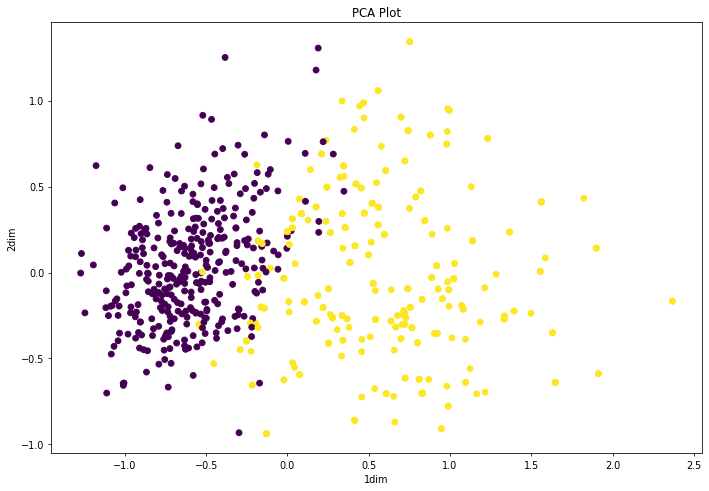

In [66]:
x_plot = []
y_plot = []
for x in X_pca:
    x_plot.append(x[0])
    y_plot.append(x[1])

plt.scatter(x_plot, y_plot, c=y_over,cmap='viridis')
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':80})
plt.title('PCA Plot')
plt.xlabel('1dim')
plt.ylabel('2dim')

## Feature selection using KBest

In [67]:
from sklearn.feature_selection import SelectKBest, chi2

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [69]:
def best_k():
    scores = []
    for i in range(1,30):
        chi2_selector = SelectKBest(chi2, k=i)
        X_kbest = chi2_selector.fit_transform(X_over, y_over)
        X_train_chi, X_test_chi, y_train, y_test = train_test_split(X_kbest, y_over, test_size=0.25, shuffle=True)
        model = LogisticRegression()
        model.fit(X_train_chi, y_train)
        scores.append(model.score(X_test_chi, y_test))
    plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':80})
    plt.figure()
    plt.plot(np.arange(0, 29, step=1),scores)
    plt.title('K')
    plt.xlabel('K value')
    plt.ylabel('K score')
    plt.grid()

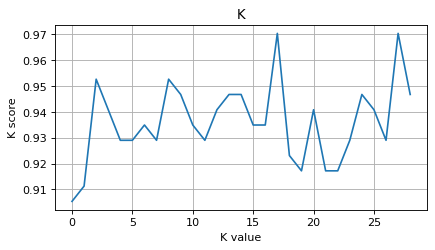

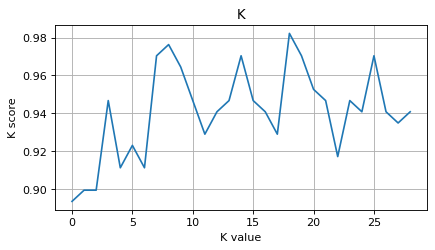

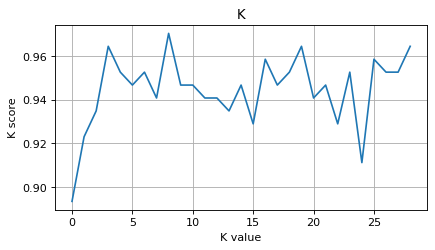

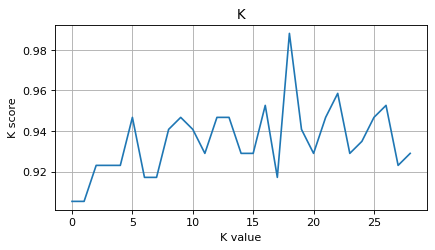

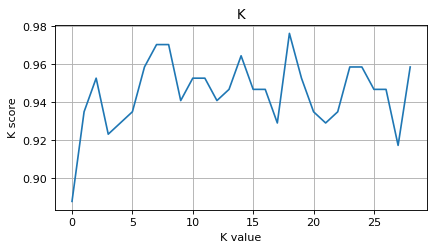

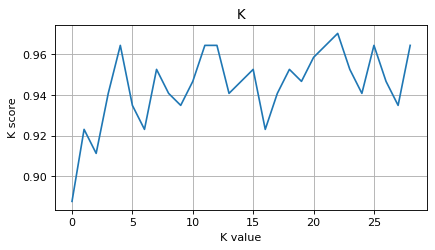

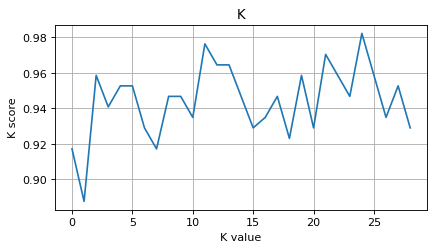

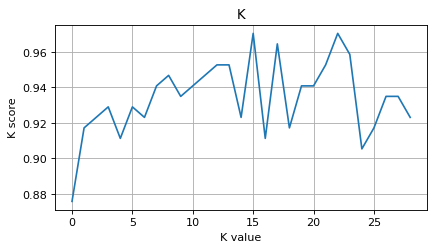

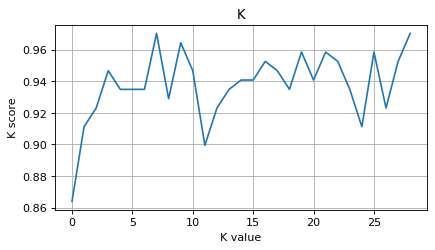

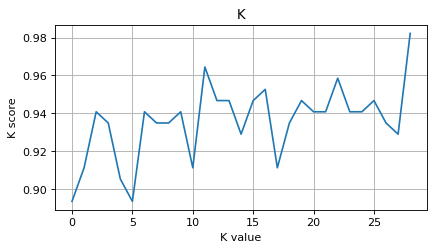

In [70]:
for i in range(0,10):
    best_k()

In [71]:
chi2_selector = SelectKBest(chi2, k=16)
X_kbest = chi2_selector.fit_transform(X_over, y_over)
chi2_selector.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'se radius',
       'se perimeter', 'se area', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness',
       'worst concavity', 'worst concave points'], dtype=object)

In [72]:
final_df = pd.DataFrame(X_kbest, columns = chi2_selector.get_feature_names_out())

final_df

,mean radius,mean texture,mean perimeter,mean area,mean concavity,mean concave points,se radius,se perimeter,se area,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,20.57,17.77,132.90,1326.0,0.08690,0.07017,0.5435,3.398,74.08,24.99,23.41,158.80,1956.0,0.18660,0.24160,0.18600
1,19.69,21.25,130.00,1203.0,0.19740,0.12790,0.7456,4.585,94.03,23.57,25.53,152.50,1709.0,0.42450,0.45040,0.24300
2,20.29,14.34,135.10,1297.0,0.19800,0.10430,0.7572,5.438,94.44,22.54,16.67,152.20,1575.0,0.20500,0.40000,0.16250
3,12.45,15.70,82.57,477.1,0.15780,0.08089,0.3345,2.217,27.19,15.47,23.75,103.40,741.6,0.52490,0.53550,0.17410
4,18.25,19.98,119.60,1040.0,0.11270,0.07400,0.4467,3.180,53.91,22.88,27.66,153.20,1606.0,0.25760,0.37840,0.19320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,14.99,25.20,95.54,698.8,0.02398,0.02899,1.2140,8.077,106.00,14.99,25.20,95.54,698.8,0.05131,0.02398,0.02899
672,15.53,33.56,103.70,744.9,0.17510,0.08399,0.2419,1.903,23.02,18.49,49.54,126.30,1035.0,0.55640,0.57030,0.20140
673,16.24,18.77,108.80,805.1,0.19480,0.09052,0.2873,2.464,28.09,18.55,25.09,126.90,1031.0,0.47060,0.50260,0.17320
674,16.69,20.20,107.10,857.6,0.03649,0.02307,0.2473,1.775,22.95,19.18,26.56,127.30,1084.0,0.29200,0.24770,0.08737


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y_over, test_size=0.25, shuffle=True)

## Calculating K for KNN

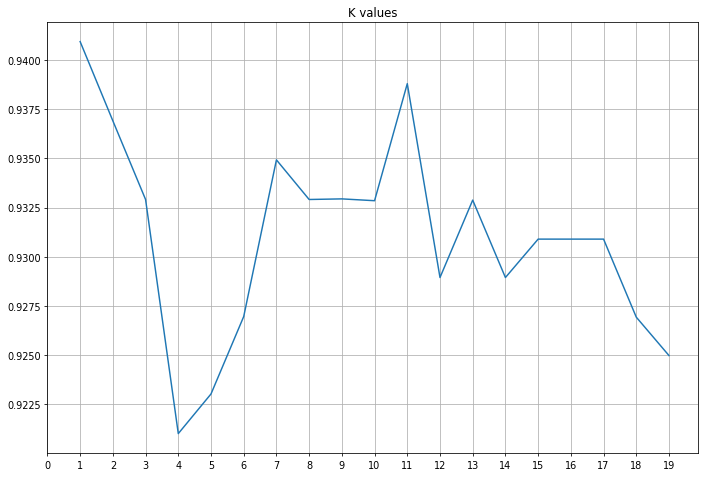

In [79]:
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':70})

knn_res=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=8)
    knn_res.append(scores.mean())

plt.plot([k for k in range(1,20)],knn_res)
plt.title("K values")
plt.xticks(ticks=np.arange(0, 20, step=1), labels=np.arange(0, 20, step=1))

plt.grid()

## KNN

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.95      0.90      0.92        82

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



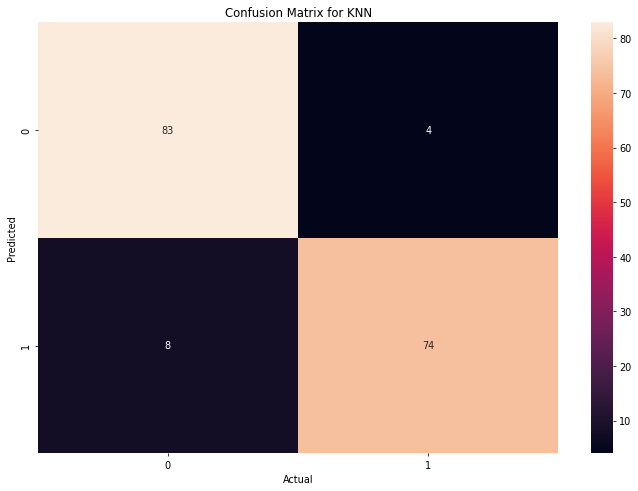

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
con_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.plot()
sns.heatmap(con_knn, annot=True);

plt.xlabel('Actual');
plt.ylabel('Predicted'); 
plt.title('Confusion Matrix for KNN'); 

print(classification_report(y_test,knn.predict(X_test)))

## Linear SVC

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        87
           1       1.00      0.77      0.87        82

    accuracy                           0.89       169
   macro avg       0.91      0.88      0.89       169
weighted avg       0.91      0.89      0.89       169



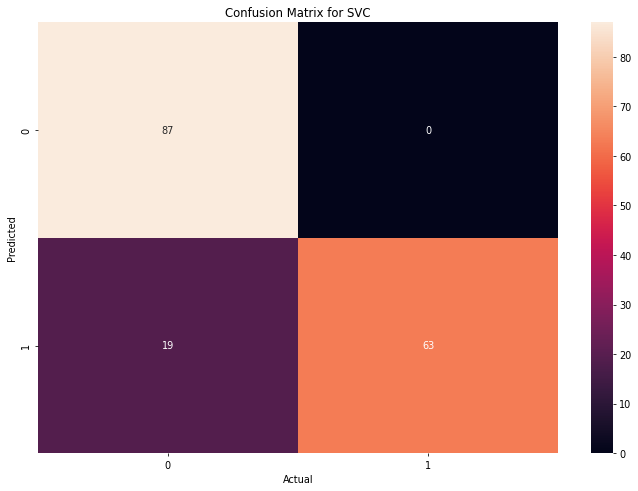

In [81]:
from sklearn.svm import SVC, LinearSVC

svc = LinearSVC(verbose=0)

svc.fit(X_train, y_train)
score = svc.score(X_train, y_train)
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

con_svc=confusion_matrix(y_test,svc.predict(X_test))
sns.heatmap(con_svc, annot=True);
plt.xlabel('Actual');
plt.ylabel('Predicted'); 
plt.title('Confusion Matrix for SVC'); 

print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        87
           1       0.99      0.99      0.99        82

    accuracy                           0.99       169
   macro avg       0.99      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



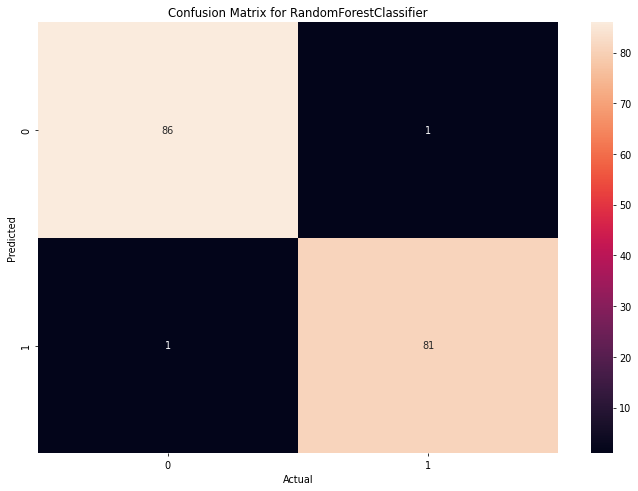

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=45)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

con_rfc=confusion_matrix(y_test,rfc.predict(X_test))

sns.heatmap(con_rfc,annot=True)
plt.xlabel('Actual');
plt.ylabel('Predicted'); 
plt.title('Confusion Matrix for RandomForestClassifier');


print(classification_report(y_test,y_pred))

## Logistic regression

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        87
           1       0.95      0.98      0.96        82

    accuracy                           0.96       169
   macro avg       0.96      0.96      0.96       169
weighted avg       0.96      0.96      0.96       169



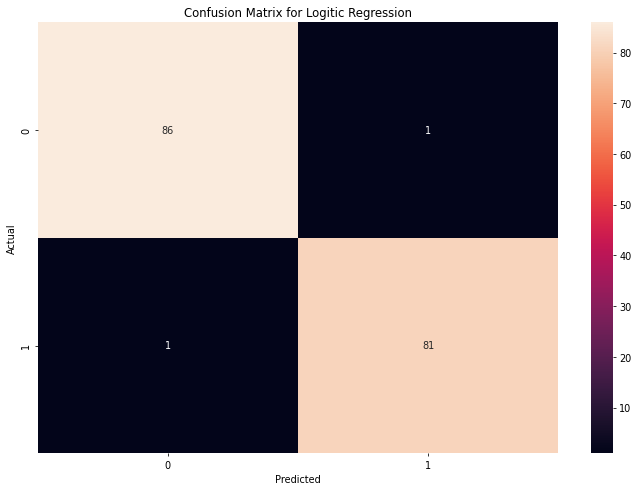

In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

con_lg=confusion_matrix(y_test,logmodel.predict(X_test))
y_pred=logmodel.predict(X_test)

sns.heatmap(con_rfc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logitic Regression")

print(classification_report(y_test,y_pred))

## Conclusion
Since the Random Forrest Classifier has the best f-1 score and accuracy then it's chosen to be the model for the classification.